# Analyse spectrale

In [1]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Chargement et affichage du signal :

In [4]:
x = np.loadtxt("../_static/consommation.csv",
               delimiter=",", skiprows=1, usecols=2)

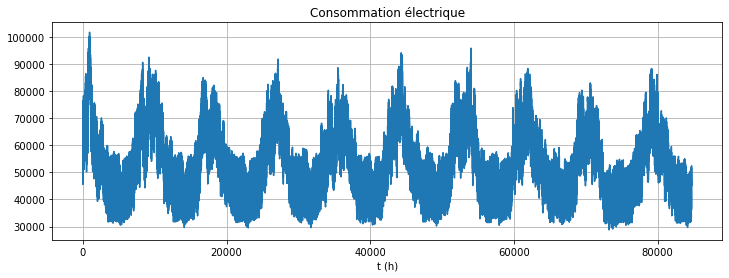

In [5]:
# Abscisses
Te = 1 # Période en heure
fe = 1/Te
N = len(x)
n = np.arange(N)
t = n/fe

# Affichage
plt.figure(figsize=(12,4))
plt.plot(t,x)
plt.xlabel("t (h)")
plt.title("Consommation électrique")
plt.grid()
plt.show()

Spectre du signal...

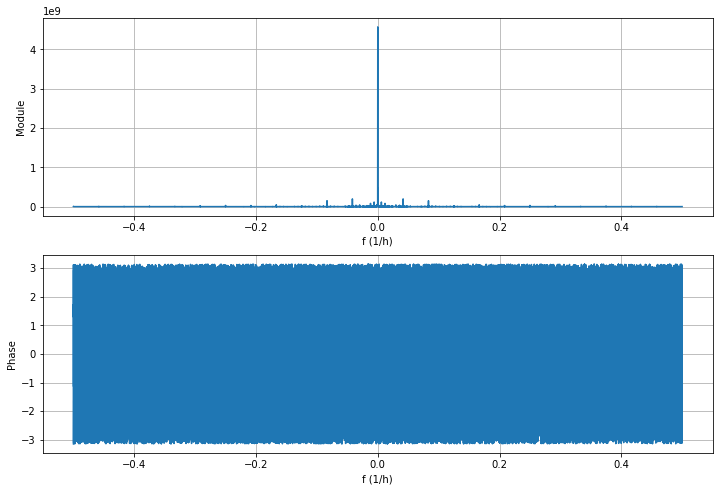

In [6]:
k = np.arange(-N/2, N/2)
f = k*fe/N

X = fft.fft(x)
X = fft.fftshift(X)
module = abs(X)
phase = np.angle(X)

plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(f, module)
plt.ylabel("Module")
plt.xlabel("f (1/h)")
plt.grid()

plt.subplot(2,1,2)
plt.plot(f, phase)
plt.ylabel("Phase")
plt.xlabel("f (1/h)")
plt.grid()

plt.show()

La phase est, comme la plupart des signaux réels, difficile à analyser...
Mais le module est informatif.

En zoomant sur les fréquences basses du spectre (`matplotlib.pyplot.xlim`), on peut identifier les fréquences principales.
La fonction `scipy.signal.find_peaks` peut aider à trouver les pics.

In [7]:
peaks, _ = find_peaks(module, height=1e8)

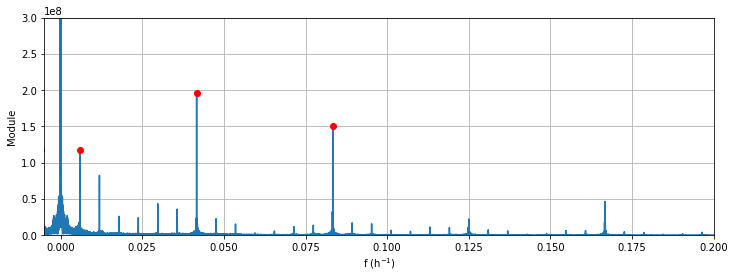

In [8]:
plt.figure(figsize=(12,4))
plt.plot(f, abs(X))
plt.ylabel("Module")
plt.xlabel("f (h$^{-1}$)")
plt.xlim([-.005, 0.2])
plt.ylim([0, 3e8])
plt.plot(f[peaks], abs(X[peaks]), 'ro')
plt.grid()
plt.show()

On peut alors afficher les fréquences des raies principales, et la période correspondante.

In [18]:
for n in [-3, -2, -1]:
    freq = f[peaks[n]]
    perh = 1/freq
    perj = perh / 24
    print(f"{freq:3.3f} h^-1 :\tphénomène qui se répète {freq:3.3f} fois par heure soit toutes les {perh:7.3f} h (ou {perj:.3f} jours)")

0.006 h^-1 :	phénomène qui se répète 0.006 fois par heure soit toutes les 168.143 h (ou 7.006 jours)
0.042 h^-1 :	phénomène qui se répète 0.042 fois par heure soit toutes les  24.000 h (ou 1.000 jours)
0.083 h^-1 :	phénomène qui se répète 0.083 fois par heure soit toutes les  12.000 h (ou 0.500 jours)


On retrouve là les périodicités hebdomadaire, quotidienne et même sur 12 heures de la consommation électrique.